In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [4]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [5]:
X = df.drop(columns='Survived')
y = df['Survived']
X

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [6]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 3), (179, 3), (712,), (179,))

In [11]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

# For Numerical value using Pandas

In [13]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

(29.78590425531915, 29.78590425531915, 32.61759689349112, 32.61759689349112)

In [14]:
mean_median = pd.DataFrame(
    {
        'Column':['Age','Fare'],
        'Mean':[mean_age,mean_fare],
        'Median':[median_age,mean_fare]
    }
)
mean_median

,Column,Mean,Median
0,Age,29.785904,28.750000
1,Fare,32.617597,32.617597


In [16]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age median'] = X_train["Age"].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare median'] = X_train["Fare"].fillna(median_fare)
X_train

,Age,Fare,Family,Age_mean,Age median,Fare_mean,Fare median
30,40.0,27.7208,0,40.000000,40.00,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.00,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.00,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.00,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,8.6625,8.6625
584,NaN,8.7125,0,29.785904,28.75,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
527,NaN,221.7792,0,29.785904,28.75,221.7792,221.7792


# Check Variance

In [18]:
variance_check = pd.DataFrame(
    {
        'Column':['Age','Fare'],
        'Original variance':[X_train['Age'].var(),X_train['Fare'].var()],
        'Mean variance':[X_train['Age_mean'].var(),X_train['Fare_mean'].var()],
        'Median variance':[X_train['Age median'].var(),X_train['Fare median'].var()]
    }
)
variance_check

,Column,Original variance,Mean variance,Median variance
0,Age,204.349513,161.812625,161.989566
1,Fare,2448.197914,2324.238526,2340.091022


# Check Distribution

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


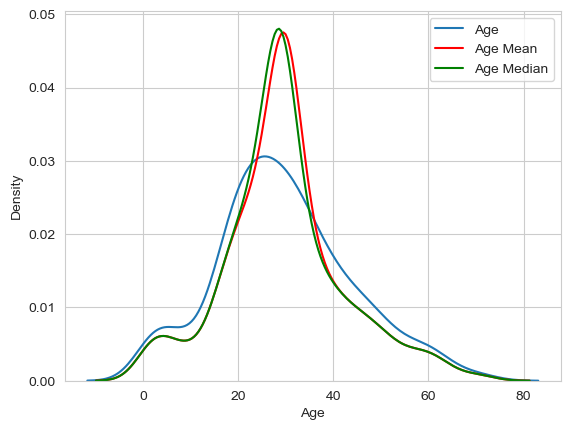

In [25]:
sns.kdeplot(data=X_train, x='Age', label='Age')
sns.kdeplot(data=X_train, x='Age_mean', color='red', label='Age Mean')
sns.kdeplot(data=X_train, x='Age median', color='green', label='Age Median')
plt.legend()

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


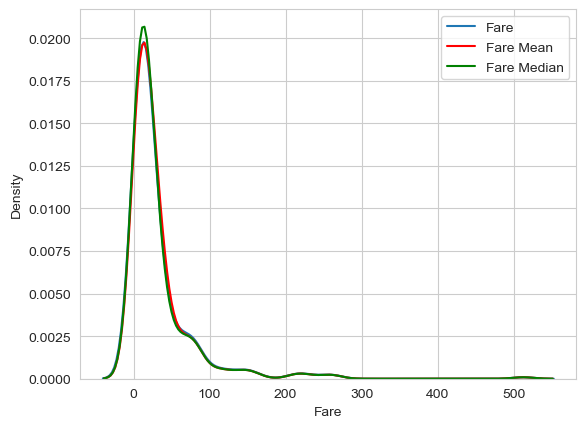

In [26]:
sns.kdeplot(data=X_train, x='Fare', label='Fare')
sns.kdeplot(data=X_train, x='Fare_mean', color='red', label='Fare Mean')
sns.kdeplot(data=X_train, x='Fare median', color='green', label='Fare Median')
plt.legend()

# Check covariance

In [27]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age median,Fare_mean,Fare median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


# Check correlation

In [28]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age median,Fare_mean,Fare median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<Axes: >

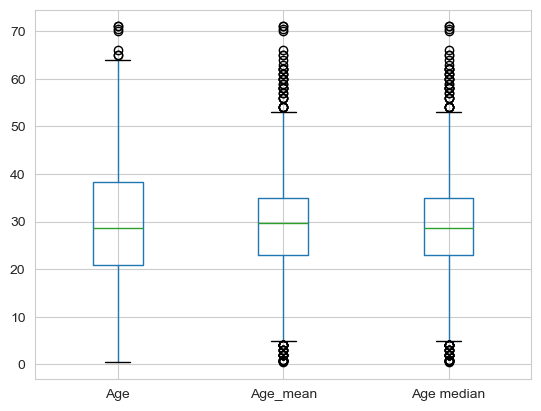

In [31]:
X_train[['Age','Age_mean','Age median']].boxplot()

<Axes: >

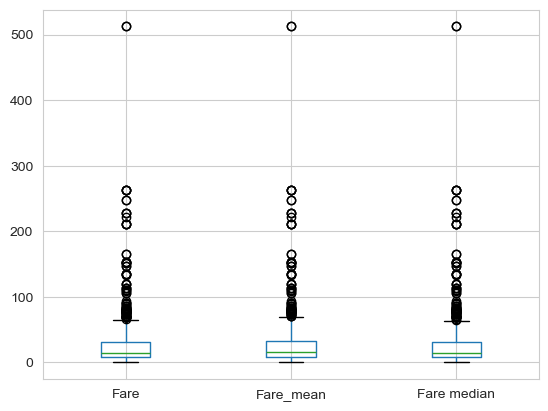

In [32]:
X_train[['Fare','Fare_mean','Fare median']].boxplot()

# Using Sklearn

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
trf = ColumnTransformer([
    ('imp1',SimpleImputer(strategy='median'),['Age']),
    ('imp2',SimpleImputer(strategy='mean'),['Fare']),
],remainder='passthrough')

In [35]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imp2', SimpleImputer(), ['Fare'])])

In [37]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [39]:
pd.DataFrame(X_train).isnull().mean()*100

0    0.0
1    0.0
2    0.0
dtype: float64